In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df= pd.read_csv('/content/Fish.csv')

In [3]:
data_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None


In [6]:
data_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
data_df["Species"].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb58f0fde50>,
      dtype=object)

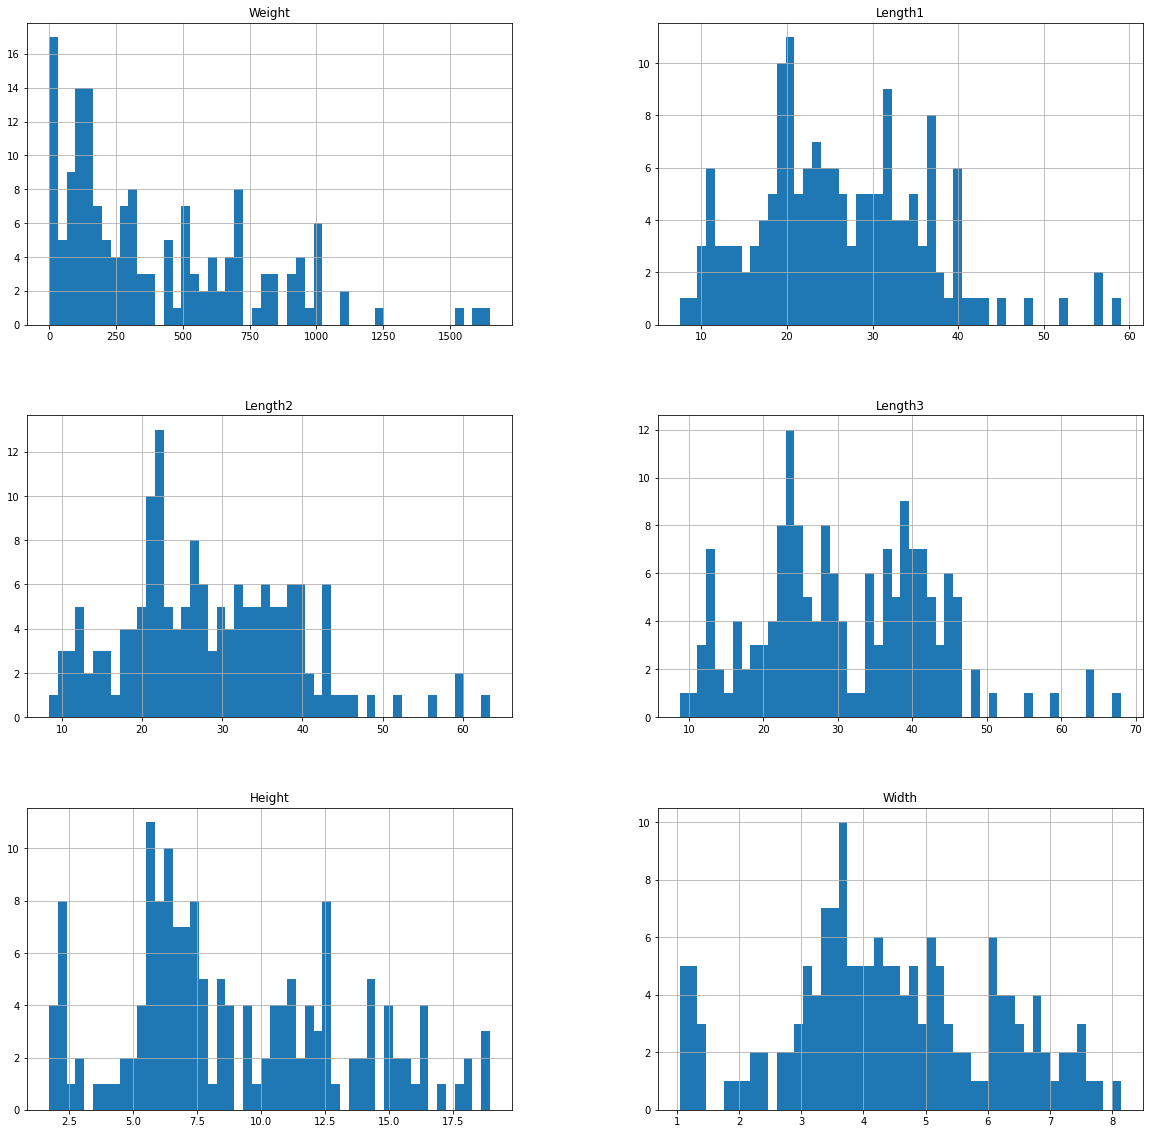

In [8]:
data_df.hist(bins=50,figsize=(20,20))

In [9]:
 #pairwise correlation
cor = data_df.corr()
cor["Weight"]

Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Name: Weight, dtype: float64

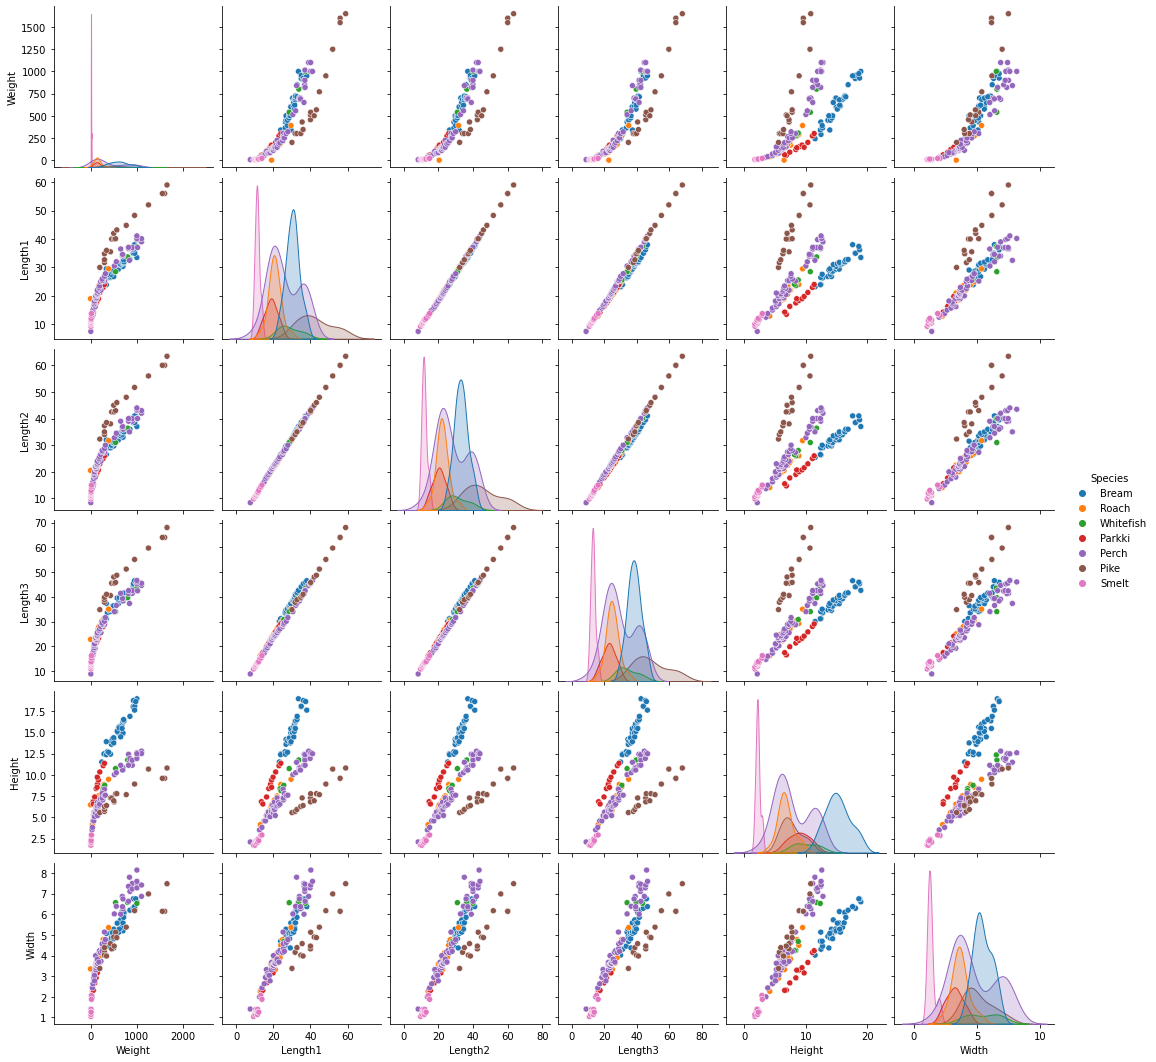

In [10]:
g = sns.pairplot(data_df, kind='scatter', hue='Species')

In [11]:
#species
Species = data_df[["Species"]]
Species.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


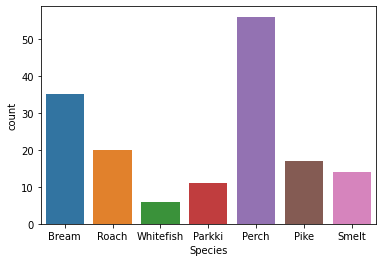

In [12]:
sns.countplot(Species["Species"])

In [13]:
#weight
Weight = data_df [["Weight"]]
Weight.head()

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


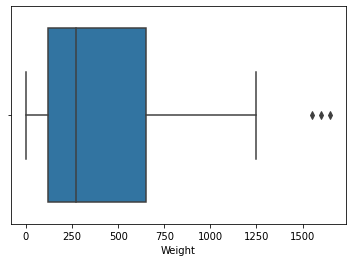

In [14]:
sns.boxplot(Weight["Weight"])

In [15]:
#Length
Length = data_df[["Length1","Length2","Length3"]]

In [16]:
Length.head()

,Length1,Length2,Length3
0,23.2,25.4,30.0
1,24.0,26.3,31.2
2,23.9,26.5,31.1
3,26.3,29.0,33.5
4,26.5,29.0,34.0


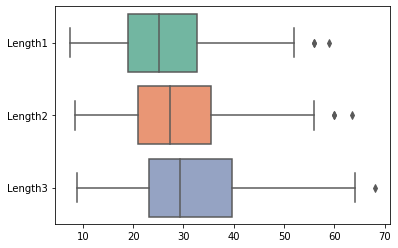

In [17]:
sns.boxplot(data=Length, orient="h", palette="Set2")

In [18]:
#Height
Height = data_df[["Height"]]
Height.head()

,Height
0,11.5200
1,12.4800
2,12.3778
3,12.7300
4,12.4440


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


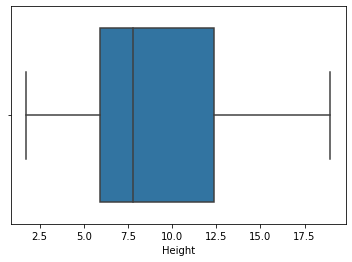

In [19]:
sns.boxplot(Height["Height"])

In [20]:
#width
Width = data_df[["Width"]]
Width.head()

,Width
0,4.0200
1,4.3056
2,4.6961
3,4.4555
4,5.1340


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


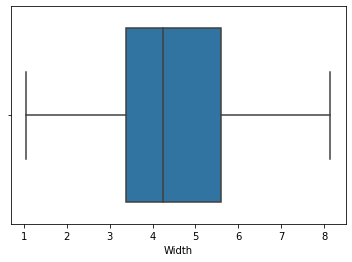

In [21]:
sns.boxplot(Width["Width"])

In [22]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(data_df,random_state=40, test_size=0.3)

In [23]:
y_train = train_set["Weight"]
data = train_set.drop(['Weight'], axis=1)
y_test = test_set["Weight"]
data_test = test_set.drop(['Weight'], axis=1)

In [24]:
y_test = test_set["Weight"]
test = test_set.drop(['Weight'], axis=1)

In [25]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
norm = Normalizer()
encoder = LabelEncoder()
data["Species"] = encoder.fit_transform(data["Species"])
data_test["Species"] = encoder.fit_transform(data_test["Species"])

In [26]:
#model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data, y_train)
lin_reg.score(data,y_train)

0.9045788248367269

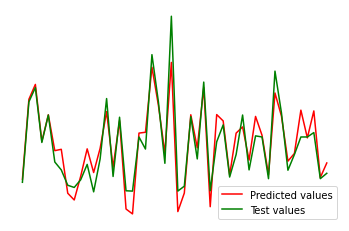

The model  explains 85% of  test data 


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lin_reg.predict(data_test)
t = np.linspace(0,len(y_pred),len(y_pred))
plt.plot(t,y_pred,'r')
plt.plot(t,y_test,'g')
plt.axis(False)
plt.legend(["Predicted values", "Test values"], loc ="lower right")
plt.show()
print("The model  explains "+str(int(r2_score(y_pred, y_test)*100))+"% of  test data ")


In [29]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(data, y_train)
forest_reg.score(data,y_train)

0.9929844358203688

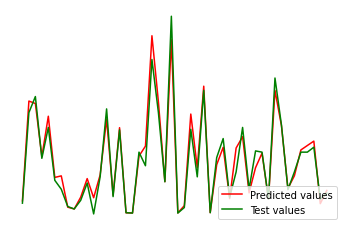

The model could explain 95% of the test data 


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = forest_reg.predict(data_test)
t = np.linspace(0,len(y_pred),len(y_pred))
plt.plot(t,y_pred,'r')
plt.plot(t,y_test,'g')
plt.axis(False)
plt.legend(["Predicted values", "Test values"], loc ="lower right")
plt.show()
print("The model could explain "+str(int(r2_score(y_pred, y_test)*100))+"% of the test data ")

In [31]:
#Grid Search CV
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid= GridSearchCV(estimator=forest_reg, param_grid=param_grid, cv = 3, n_jobs=-1)
grid_result = grid.fit(data, y_train)
print("The best score is: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

The best score is: 0.974516 using {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


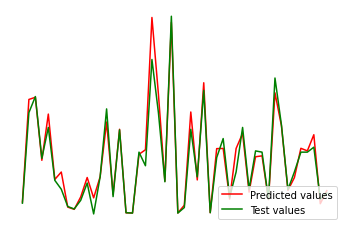

The model could explain 95% of the test data 


In [32]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = grid.predict(data_test)
t = np.linspace(0,len(y_pred),len(y_pred))
plt.plot(t,y_pred,'r')
plt.plot(t,y_test,'g')
plt.axis(False)
plt.legend(["Predicted values", "Test values"], loc ="lower right")
plt.show()
print("The model could explain "+str(int(r2_score(y_pred, y_test)*100))+"% of the test data ")